In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression

pd.set_option('display.max_columns', 21)
arquivo = pd.read_csv('C:/Users/jose-/OneDrive/Área de Trabalho/Arquivos_para_manipulação_em_python/128_270_compressed_kc_house_data.csv/kc_house_data.csv')
arquivo.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
arquivo.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
arquivo.drop('date', axis=1, inplace=True)
arquivo.drop('id', axis=1, inplace=True)
arquivo.drop('zipcode', axis=1, inplace=True)
arquivo.drop('lat', axis=1, inplace=True)
arquivo.drop('long', axis=1, inplace=True)

In [5]:
arquivo.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [6]:
#definindo alvo => coluna price
y = arquivo['price']
x = arquivo.drop('price',axis=1)#coloca todas as informações em x exceto a coluna price

In [7]:
#separando em dados de treino e dados de teste:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=14)

In [8]:
#criando modelo:
modelo = LinearRegression()
modelo.fit(x_treino,y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
#calculando coeficiente R2
resultado = modelo.score(x_teste,y_teste)
print(resultado)
arquivo.columns

0.6538094196280897


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [10]:
#Fazendo correlação das variaveis:
pd.set_option('display.width',130)

print(arquivo.corr(method = 'pearson'))

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront      view  condition     grade  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698    1.000000  0.401857   0.016653  0.082775   
view    

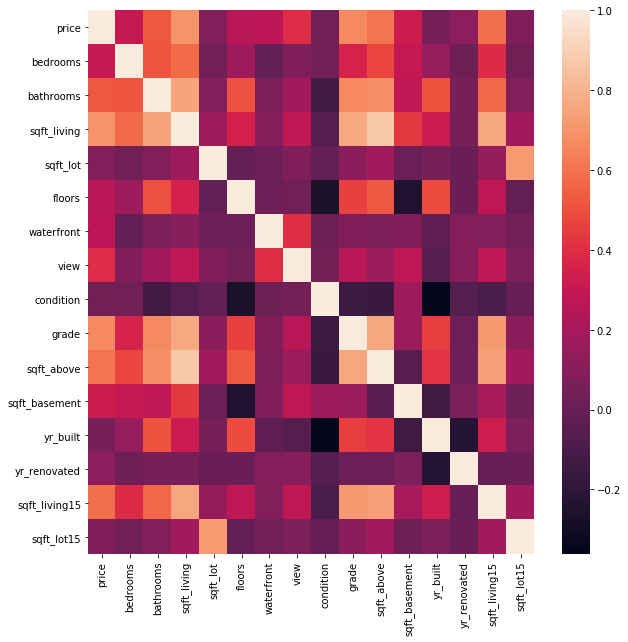

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(arquivo.corr())

In [17]:
from sklearn.linear_model import Ridge
modeloRidge = Ridge(alpha=1)
modeloRidge.fit(x_treino,y_treino)
resultadoRidge = modeloRidge.score(x_teste,y_teste)
print(resultadoRidge)

0.6539029726255619


In [20]:
from sklearn.linear_model import Lasso
modeloLasso = Lasso(alpha=1000, max_iter=1000, tol=0.1)
modeloLasso.fit(x_treino,y_treino)
resultadoLasso = modeloLasso.score(x_teste,y_teste)
print(resultadoLasso)

0.6547706041742776


In [33]:
from sklearn.linear_model import ElasticNet
modeloElasticNet = ElasticNet(alpha=1, l1_ratio = 0.5, max_iter=10000, tol=0.3)
modeloElasticNet.fit(x_treino,y_treino)
resultadoElasticNet = modeloElasticNet.score(x_teste,y_teste)
print(resultadoElasticNet)

0.623373964020943
